# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
- Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [2]:
#Your code here
import pandas as pd
df=pd.read_csv('nashville-meetup/group-edges.csv')
df.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [29]:
#Your code here
disc=pd.read_csv('nashville-meetup/meta-groups.csv')
source = disc[disc.group_id==df.group1[i]].group_name


pandas.core.series.Series

In [ ]:
## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [41]:
#Your code here
import networkx as nx


group_dict = dict(zip(disc.group_id, disc.group_name))


G=nx.Graph()
for i in df.index:
    source = group_dict[df.group1[i]]
    target = group_dict[df.group2[i]]   
    G.add_edge(source, target, weight=df.weight[i])
 
    

## Visualize the Network

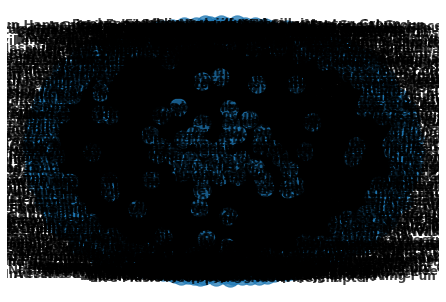

In [42]:
#Your code here

nx.draw(G, with_labels=True, 
            alpha=.75, font_weight="bold", pos=nx.spring_layout(G, k=2.66, seed=10))

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

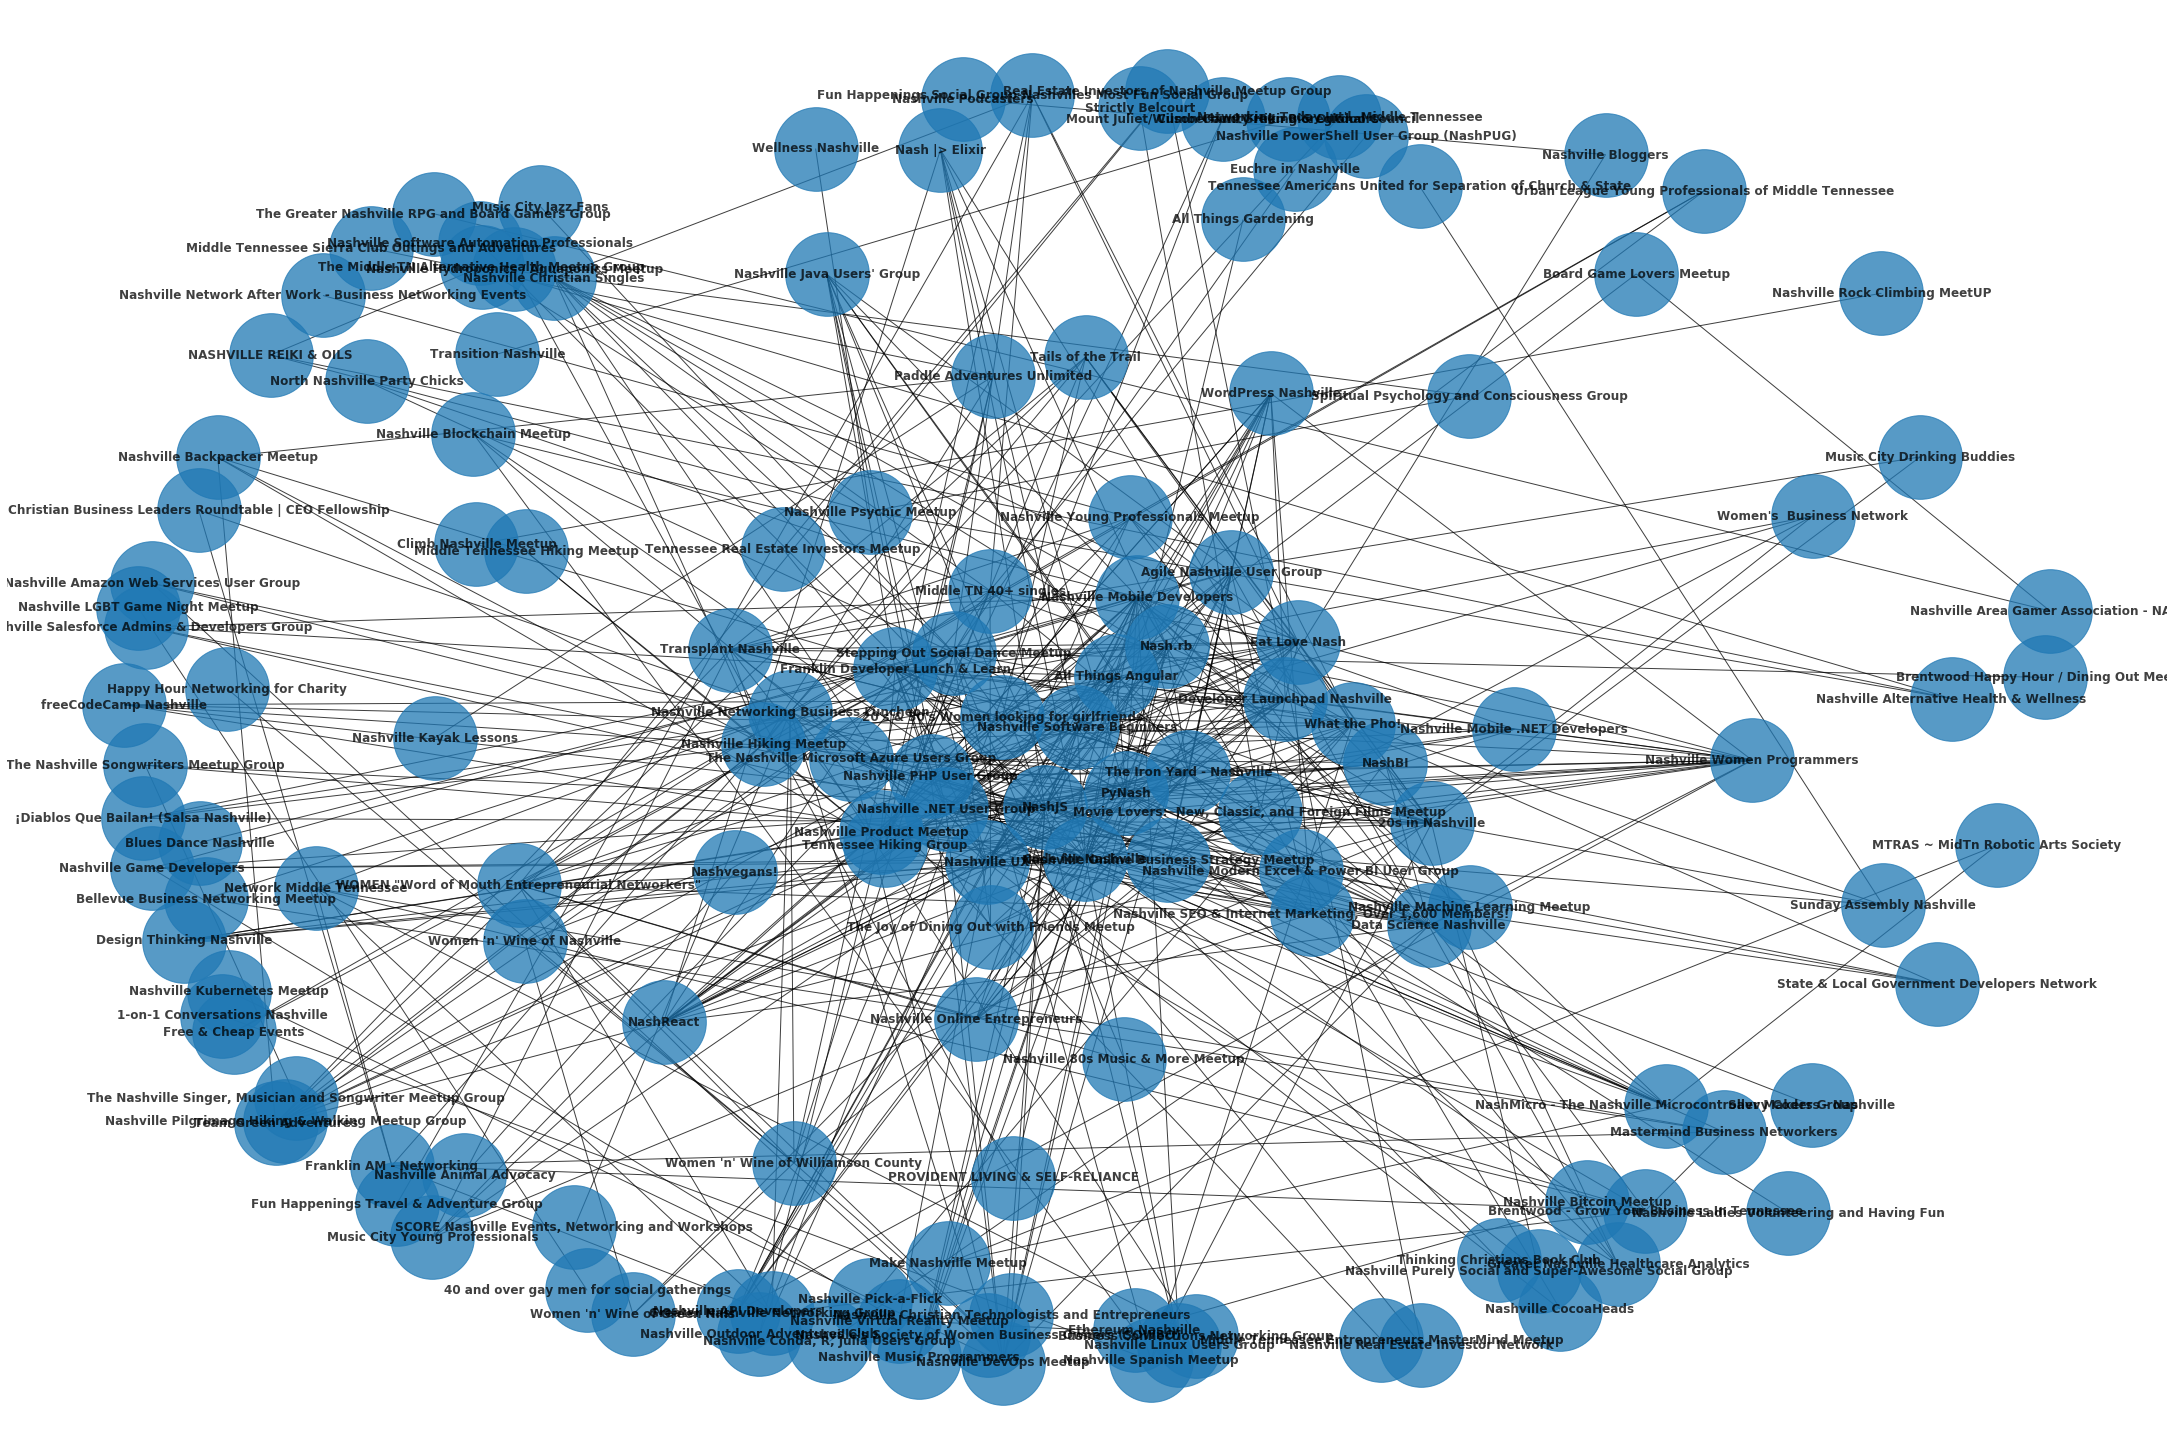

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline


#Your code here


threshold=5
subG=nx.Graph()
for i in df.index:
    weight=df.weight[i]
    if weight > 5 :
        source = group_dict[df.group1[i]]
        target = group_dict[df.group2[i]]   
        subG.add_edge(source, target, weight=weight)
        
plt.figure(figsize=(30,20))        
nx.draw(subG, with_labels=True, 
            alpha=.75, font_weight="bold", node_size=7000, pos=nx.spring_layout(G, k=2.66, seed=10))
plt.show()

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [54]:
#Your code here
c_gn = list(nx.algorithms.community.centrality.girvan_newman(subG))
for i, num in enumerate(c_gn):
    print('Afetr removing {} edges, numbers of clusters is {}'.format(i, len(num)))

Afetr removing 0 edges, numbers of clusters is 7
Afetr removing 1 edges, numbers of clusters is 8
Afetr removing 2 edges, numbers of clusters is 9
Afetr removing 3 edges, numbers of clusters is 10
Afetr removing 4 edges, numbers of clusters is 11
Afetr removing 5 edges, numbers of clusters is 12
Afetr removing 6 edges, numbers of clusters is 13
Afetr removing 7 edges, numbers of clusters is 14
Afetr removing 8 edges, numbers of clusters is 15
Afetr removing 9 edges, numbers of clusters is 16
Afetr removing 10 edges, numbers of clusters is 17
Afetr removing 11 edges, numbers of clusters is 18
Afetr removing 12 edges, numbers of clusters is 19
Afetr removing 13 edges, numbers of clusters is 20
Afetr removing 14 edges, numbers of clusters is 21
Afetr removing 15 edges, numbers of clusters is 22
Afetr removing 16 edges, numbers of clusters is 23
Afetr removing 17 edges, numbers of clusters is 24
Afetr removing 18 edges, numbers of clusters is 25
Afetr removing 19 edges, numbers of clusters

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

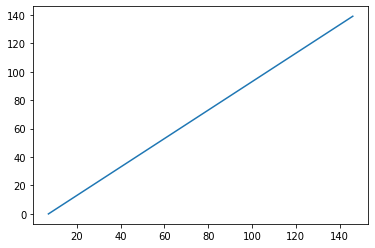

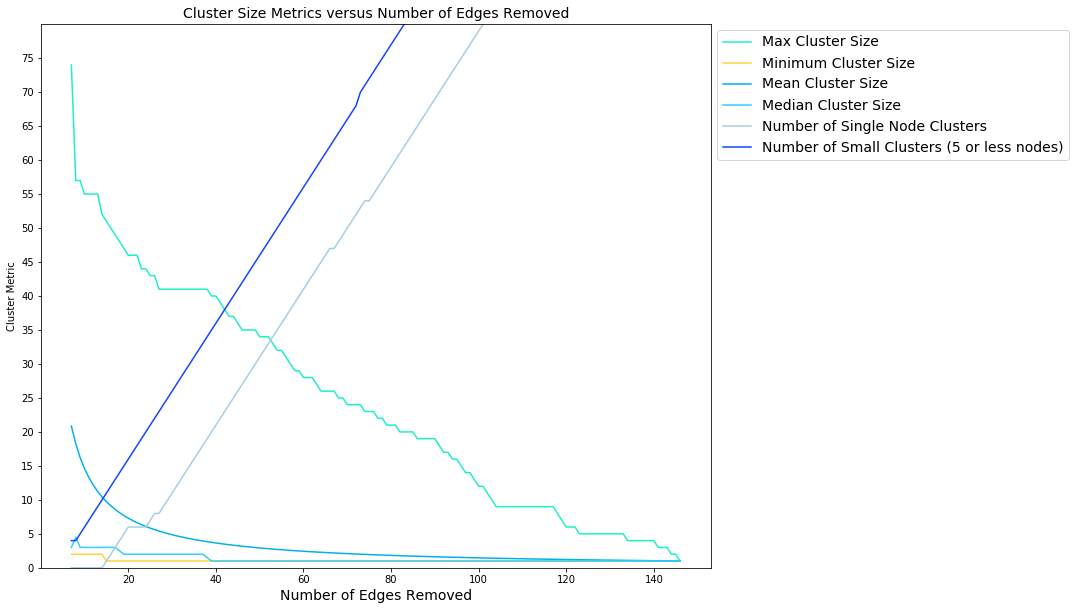

In [56]:
#Your code here
import numpy as np
x=[len(num) for num in c_gn]
y=[n for n in range(len(c_gn))]
colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
plt.plot(x,y)
gn_clusters=c_gn
fig = plt.figure(figsize=(12,10))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()


## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

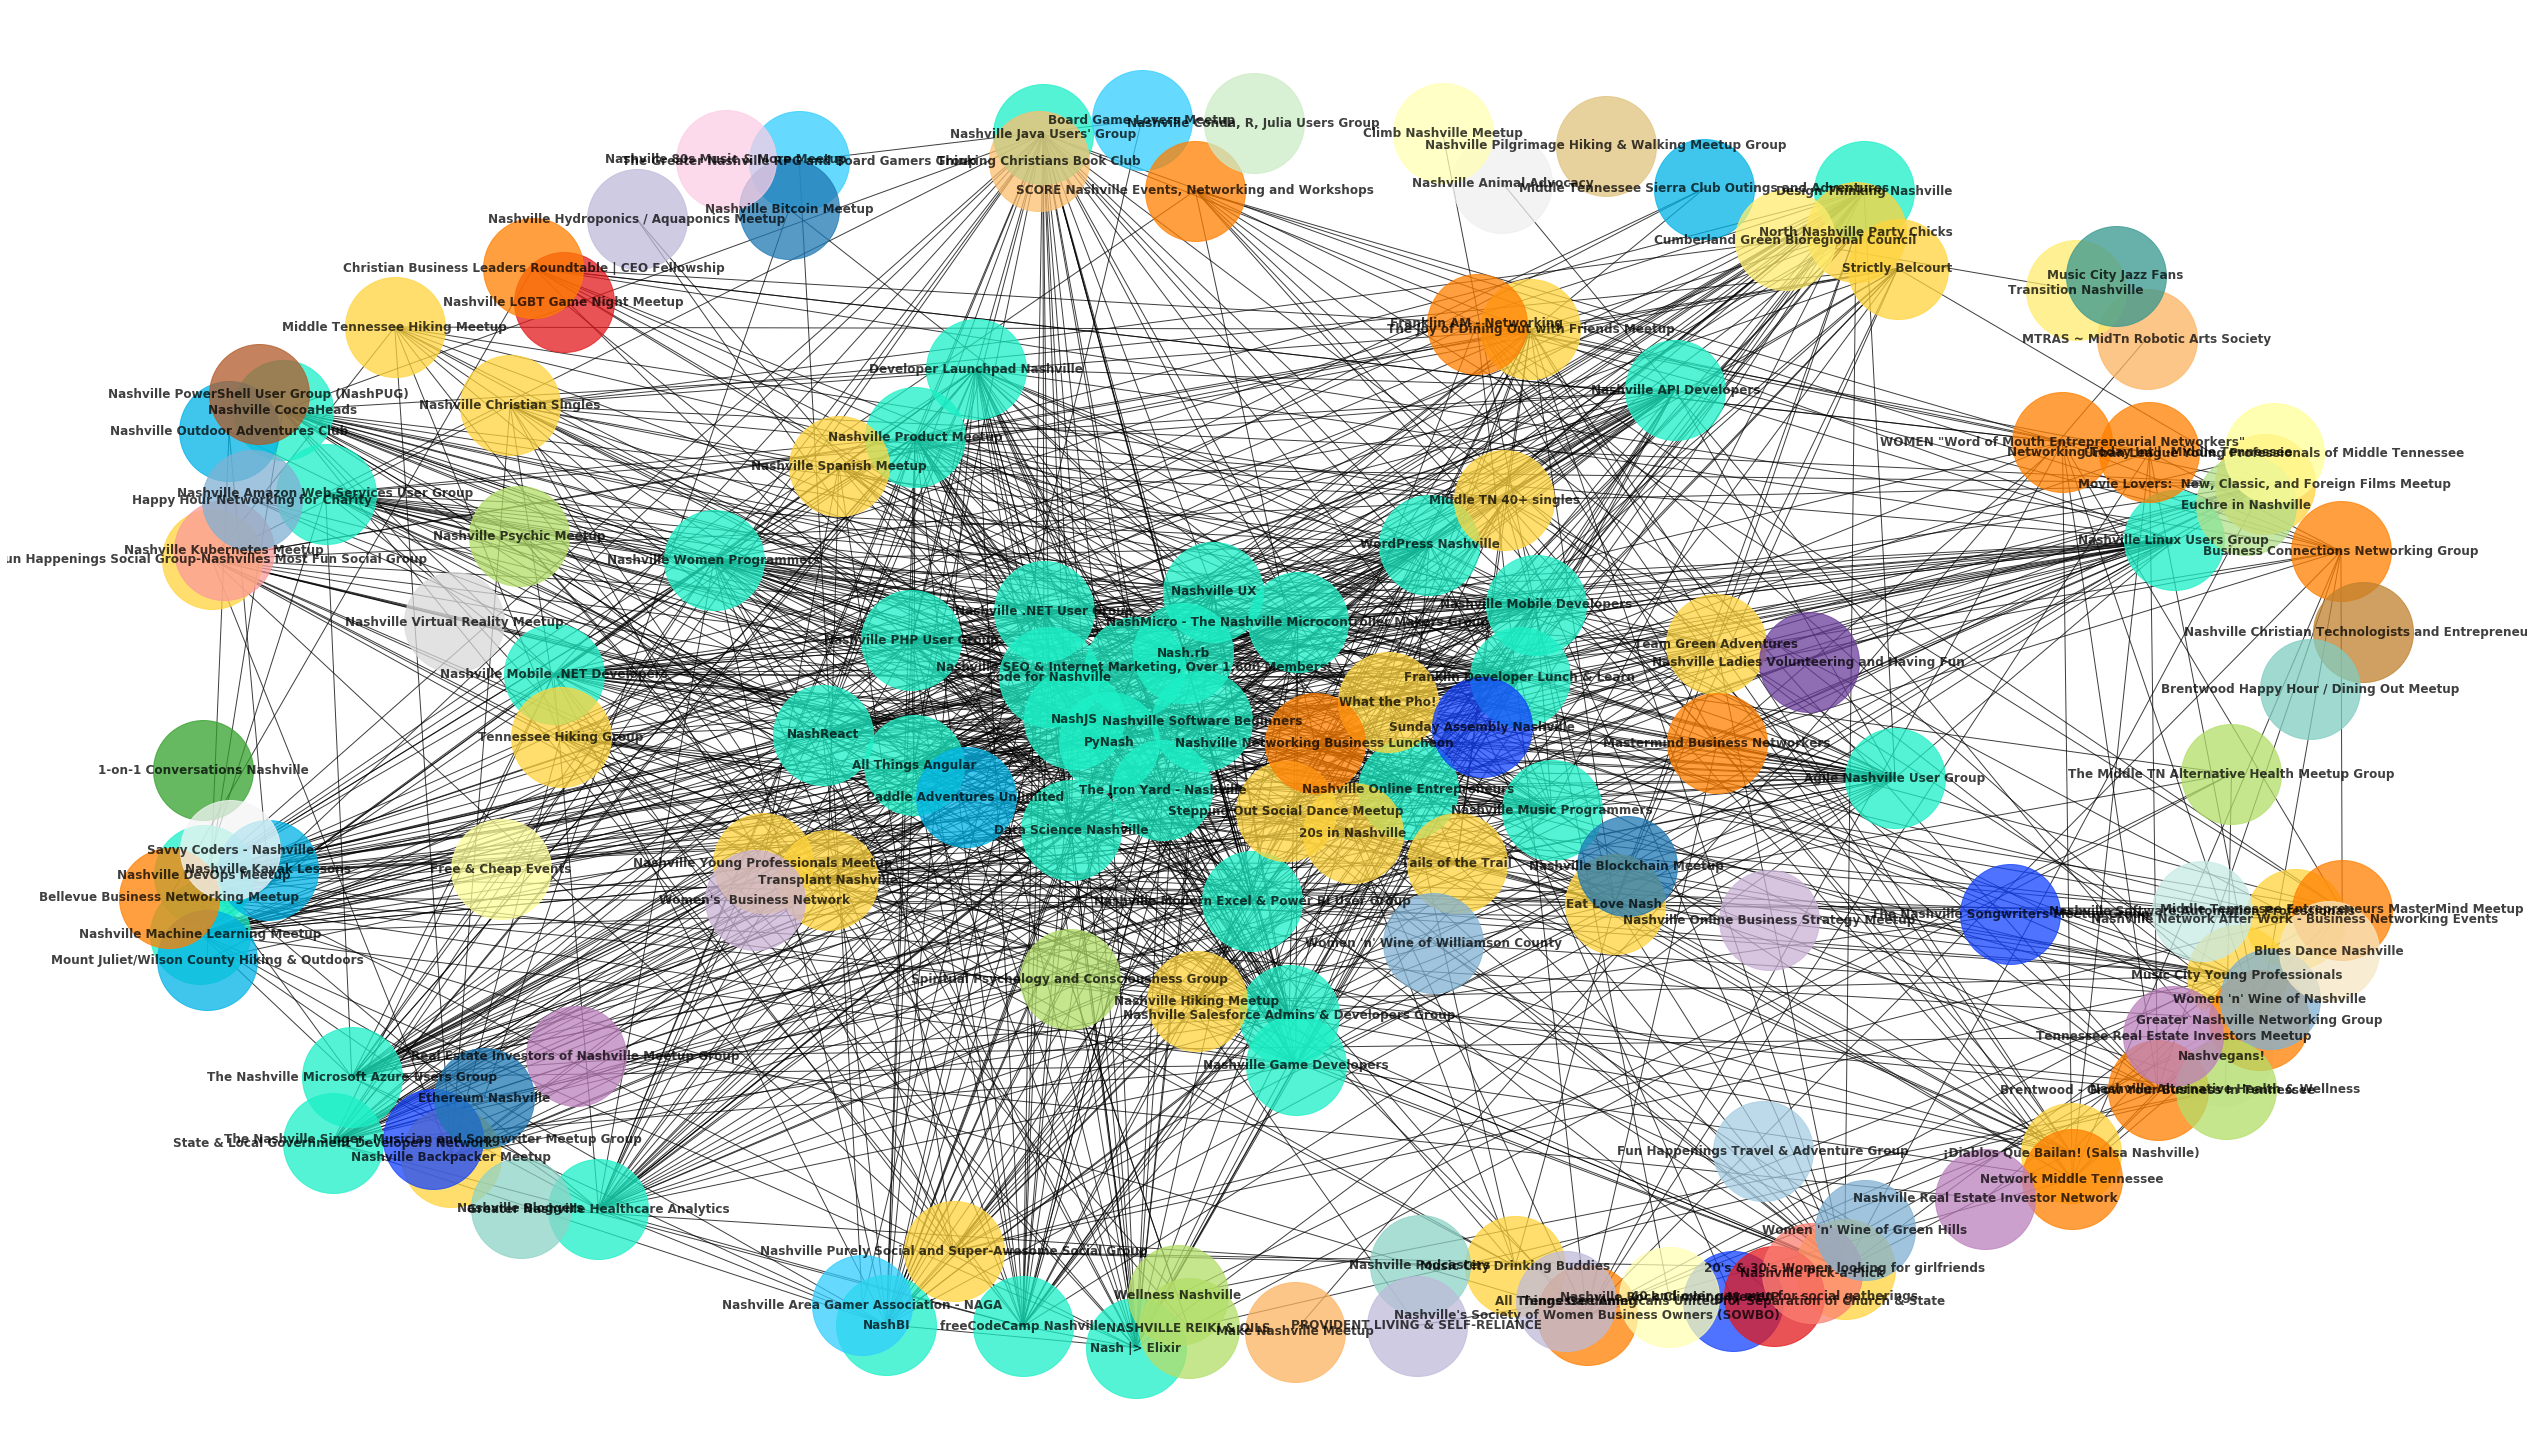

In [61]:
#Your code here
def plot_girvan_newman(G, clusters):
    fig = plt.figure(figsize=(35,20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
    
    
    for n2, c in enumerate(clusters):
        ci = G.subgraph(c)
        color = colors[n2]
        nx.draw(ci, with_labels=True, node_color=color, node_size=10000,
                alpha=.75, font_weight="bold", pos=nx.spring_layout(G,k=2.66, seed=7));
    plt.show()
        #Your code here
        
        
        
plot_girvan_newman(G, c_gn[30])

In [79]:
clusters=pd.DataFrame(c_gn[20]).T
clusters.columns = ["Cluster{}".format(i) for i in range(1,len(clusters.columns)+1)]
clusters


Cluster1  \
0                                 WordPress Nashville   
1                    Nashville Mobile .NET Developers   
2         State & Local Government Developers Network   
3                    Franklin Developer Lunch & Learn   
4                   Nashville Machine Learning Meetup   
5                                  All Things Angular   
6                         Nashville Java Users' Group   
7                           Nashville .NET User Group   
8                         Nashville Women Programmers   
9   Nashville SEO & Internet Marketing, Over 1,600...   
10                                            Nash.rb   
11                        Nashville Linux Users Group   
12                             freeCodeCamp Nashville   
13                                             NashBI   
14                          Design Thinking Nashville   
15                            Nashville DevOps Meetup   
16                               Nashville CocoaHeads   
17                                     Nash |> Elixir   
18                      Developer Launchpad Nashville   
19           Nashville Amazon Web Services User Group   
20                                             PyNash   
21                         Agile Nashville User Group   
22                             Data Science Nashville   
23                           Nashville PHP User Group   
24                     Nashville Online Entrepreneurs   
25                        Nashville Mobile Developers   
26                                             NashJS   
27                           Nashville Product Meetup   
28                       Nashville Software Beginners   
29                                 Code for Nashville   
30     Nashville Salesforce Admins & Developers Group   
31                                          NashReact   
32                           Nashville API Developers   
33             Greater Nashville Healthcare Analytics   
34       Nashville Modern Excel & Power BI User Group   
35                        Nashville Music Programmers   
36                                       Nashville UX   
37          The Nashville Microsoft Azure Users Group   
38                          The Iron Yard - Nashville   
39                          Nashville Game Developers   
40  NashMicro - The Nashville Microcontroller Make...   

                                             Cluster2  \
0   Movie Lovers:  New, Classic, and Foreign Films...   
1              ¡Diablos Que Bailan! (Salsa Nashville)   
2        Nashville Ladies Volunteering and Having Fun   
3                      1-on-1 Conversations Nashville   
4             Fun Happenings Travel & Adventure Group   
5                             Nashville Hiking Meetup   
6                         Music City Drinking Buddies   
7                Nashville Young Professionals Meetup   
8                               Middle TN 40+ singles   
9                            Nashville Spanish Meetup   
10                                  Strictly Belcourt   
11                     Music City Young Professionals   
12                        Nashville Christian Singles   
13           Brentwood Happy Hour / Dining Out Meetup   
14                                Euchre in Nashville   
15                             Tennessee Hiking Group   
16  Fun Happenings Social Group-Nashvilles Most Fu...   
17                                 Tails of the Trail   
18          20's & 30's Women looking for girlfriends   
19                       North Nashville Party Chicks   
20  Nashville Purely Social and Super-Awesome Soci...   
21                  Nashville 80s Music & More Meetup   
22                              Team Green Adventures   
23  Nashville Network After Work - Business Networ...   
24                              Blues Dance Nashville   
25                                   20s in Nashville   
26                               Music City Jazz Fans   
27                             Nashville Pick-a-Flick 

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               